##### This is a Python **3** Notebook!

In [1]:
import matplotlib.pyplot as pp
from numpy import *
%matplotlib inline

# 7.1 Linear Discriminant Analysis

# 7.2 Variability of classification

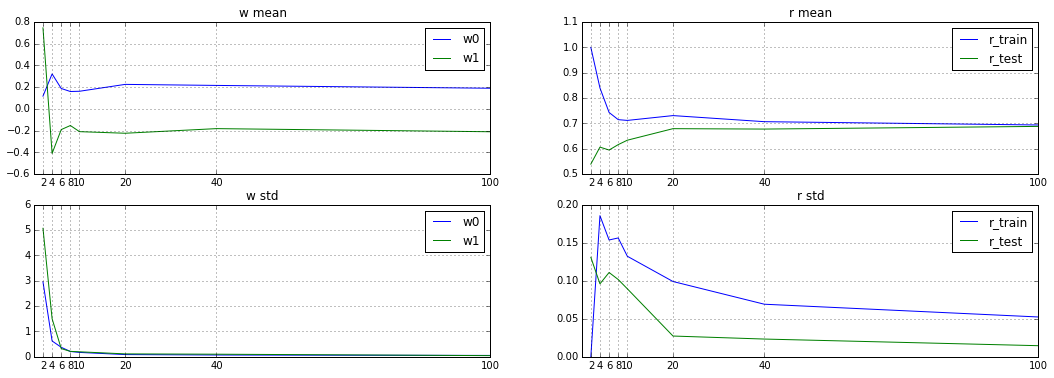

In [2]:
def sample(mu1, mu2, sigma, N):
    n = int(N/2)
    X1 = random.multivariate_normal(mu1, sigma, n)
    X2 = random.multivariate_normal(mu2, sigma, n)
    Y1 = -ones(n)
    Y2 = ones(n)
    X = vstack([X1, X2])
    Y = hstack([Y1, Y2])
    return X, Y

def ex72():
    mu1 = (0,1)
    mu2 = (1,0)
    sigma = 2*eye(2)

    T = [] # result table
    for N in [2, 4, 6, 8, 10, 20, 40, 100]:
        trials = []
        for i in range(50):
            # 1. generate (N,d) samples, (N) labels
            X, Y = sample(mu1, mu2, sigma, N)

            # 2. find weights
            # w = linalg.pinv(X).dot(Y)
            w = linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

            # 3. predict 1000 new data points
            X_test, Y_test = sample(mu1, mu2, sigma, 1000)
            Y_predicted = sign(w.dot(X.T))
            Y_test_predicted = sign(w.dot(X_test.T))

            # 4. calc %(correct classifications) for X and X_test
            r = sum(Y_predicted == Y)/len(Y)
            r_test = sum(Y_test_predicted == Y_test)/len(Y_test)

            trials.append([N, w[0], w[1], r, r_test])
        T.append(trials)
    T = array(T) # (#Ns=8, #trials=50, #values=5)-array

    pp.figure(figsize=(18,6))
    pp.subplot(2,2,1)
    pp.plot(T[:,0,0], T[:,:,1].mean(1), label="w0")
    pp.plot(T[:,0,0], T[:,:,2].mean(1), label="w1")
    pp.title("w mean")
    pp.legend(loc="best")
    pp.xticks(T[:,0,0])
    pp.grid()
    
    pp.subplot(2,2,2)
    pp.plot(T[:,0,0], T[:,:,3].mean(1), label="r_train")
    pp.plot(T[:,0,0], T[:,:,4].mean(1), label="r_test")
    pp.title("r mean")
    pp.legend(loc="best")
    pp.xticks(T[:,0,0])
    pp.grid()

    pp.subplot(2,2,3)
    pp.plot(T[:,0,0], T[:,:,1].std(1), label="w0")
    pp.plot(T[:,0,0], T[:,:,2].std(1), label="w1")
    pp.title("w std")
    pp.legend(loc="best")
    pp.xticks(T[:,0,0])
    pp.grid()

    pp.subplot(2,2,4)
    pp.plot(T[:,0,0], T[:,:,3].std(1), label="r_train")
    pp.plot(T[:,0,0], T[:,:,4].std(1), label="r_test")
    pp.title("r std")
    pp.legend(loc="best")
    pp.xticks(T[:,0,0])
    pp.grid()
    
    return

ex72()

- w stabilises early (N<=10) towards the expected direction (1,-1)
- for N>=10 w is roughly the same for each trial
- for low N we can seperate the two training-sets nearly prefectly, but perform badly on the fixed-sized test-sets. for higher N, training- and test-set performances converge.
- while w's rough orientation is determined fairly early (N=10), we require a much higher sample size (N>=40) to get consistently good results, as the "r std"-plot shows. (diminishing returns)

# 7.3 Approximations to the Binomial Distribution

## (a) binomial distribution

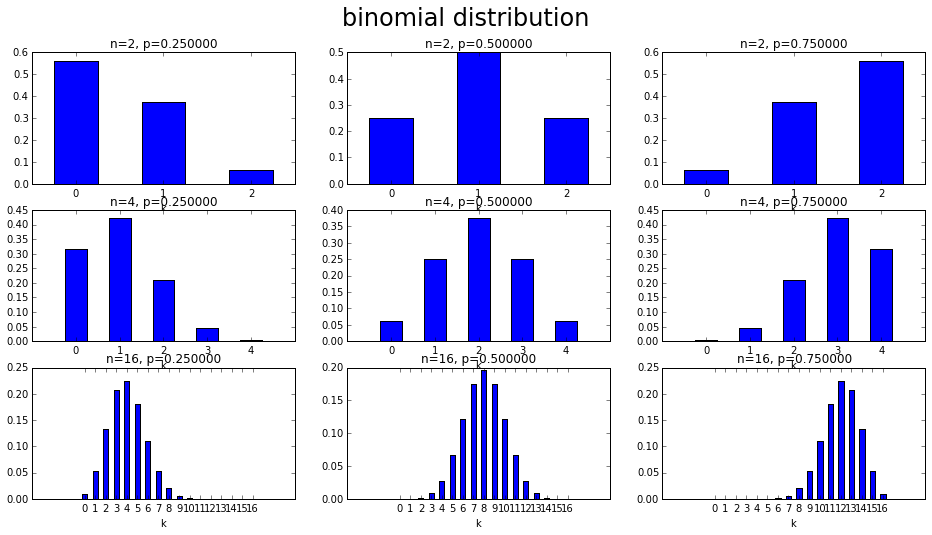

In [3]:
from scipy.misc import comb as nCk

def f_binomial(k,n,p): # k successes in n tries, each with probability p
    return nCk(n,k) * (p**k) * ((1-p)**(n-k))

def ex73a():
    pp.figure(figsize=(16,8))
    pp.suptitle("binomial distribution", fontsize=24)
    index = 1
    ps = 3
    ns = array([2,4,16])
    for n in ns:
        for p in linspace(0, 1, ps+2)[1:-1]:
            Y = []
            
            for k in range(n+1):
                Y.append(f_binomial(k,n,p))
            
            pp.subplot(len(ns), ps, index)
            pp.bar(arange(n+1)-0.25, Y, 0.5)
            pp.title("n=%i, p=%f" % (n, p))
            pp.xticks(range(n+1))
            pp.xlabel("k")
            index += 1
    return
ex73a()


#### describe an example experiment
Series of an independent experiment with a binary outcome, like tossing a coin and observing the side it lands on.

#### what are the central properties of the binomial distributiion
It's centered on np, it's variance is np(1-p).
each trial must be independent with a fixed success probability

#### in which situations might it therefore not be a good model
it's important to know on which factors the probability p depends e.g. if you want to estimate the probability that it rains on a given day you can not simply count the rainy days in a time intervall of n days and divide the number by n because you will get different results for different seasons and regions and the results might be not statistically independent since the probability of rain should be higher if you already got rain the day before because of a low pressure zone passing your home region

## (b) normal distribution

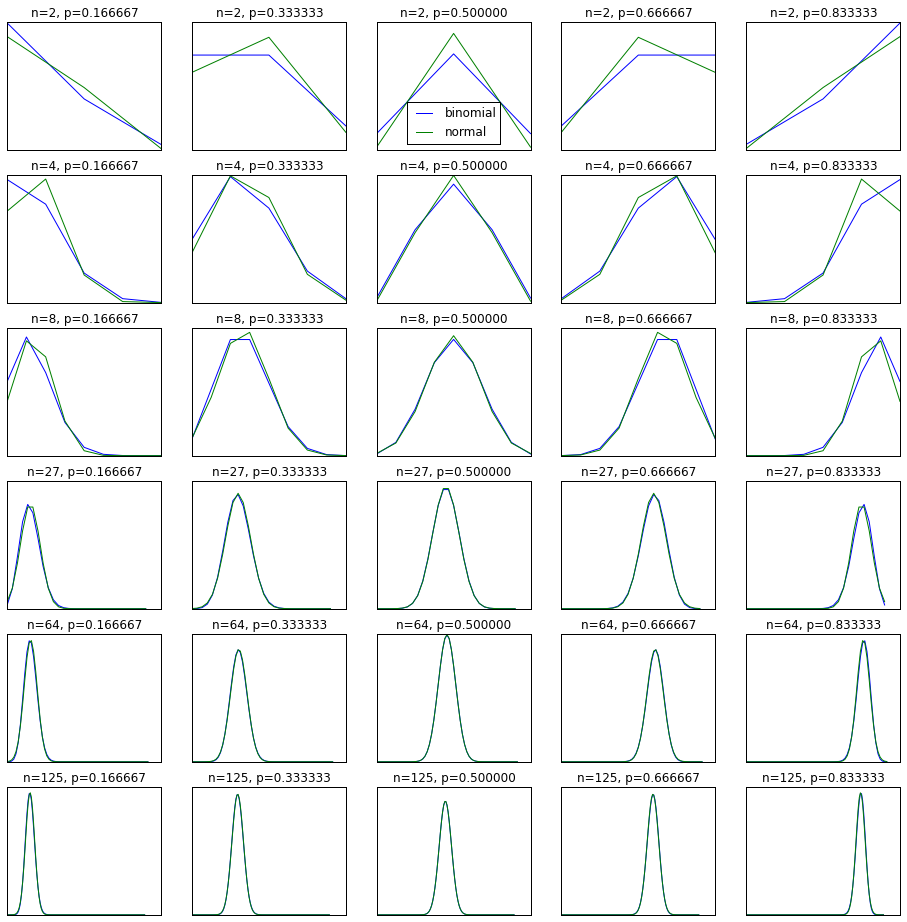

In [19]:
def f_normal(x,mu,sigma):
    return (exp(-((x-mu)**2)/(2*sigma**2))) / (sigma*sqrt(2*pi))

def ex73b():
    pp.figure(figsize=(8,4))
    pp.suptitle("normal distribution", fontsize=24)
    index = 1
    
    mu = 0
    for sigma in [2,4,8]:
        X = linspace(-40, 40, 100)
        Y = f_normal(X,mu,sigma)

        pp.plot(X, Y, label="sigma=%s" % str(sigma))
        index += 1
    pp.legend()
    return
# ex73b()

def ex73bb(): # draw the normal over the binomial distribution
    pp.figure(figsize=(16,16))
    
    i = 0
    ns = hstack([array([2,4]), (arange(2,6)**3)])
    
    for n in ns:
        for p in linspace(0, 1, 7)[1:-1]:
            pp.subplot(len(ns),5,i+1)
            X = arange(n+1)

            Y_binomial = [f_binomial(x,n,p) for x in X]
            Y_normal = f_normal(X, n*p, sqrt(n*p*(1-p)))

            pp.plot(X, Y_binomial, label="binomial")
            pp.plot(X, Y_normal, label="normal")
            pp.title("n=%i, p=%f" % (n,p))
            pp.yticks([])
            pp.xticks([])
            if (i == 2):
                pp.legend(loc="lower center")
            
            i += 1
ex73bb()

#### under which conditions is the normal distr. a reasonable approx. to the binomial distr.?
for high n (n >= 20, the higher the better), p != 0 and p != 1
with mu ~= np, sigma**2 ~= np(1-p)

#### under which conditions is it problematic?
for relatively low bucket size n, and if p additionally deviates from 0.5.

#### viz. one example each for a good/bad fit.
in the figure above, n=8, p=0.5 is the lowest bucket size, for which the approximation via normal distr. seems acceptable. the higher or left/right you go, the worse it gets. likewise, the higher n is, the better the approximation becomes.

#### give 1+ reasons, why it's so widely used
the normal distr. reasonably approximates the binomial distribution for n >= 20, which is pretty low. it's also faster to compute.
many random processes in nature can be split into a huge number of random subprocesses which is the reason why we have normal distributions everywhere.

#### is it a good approx. of the example random exp. you gave above (coin toss)?
depends on how often you flip the coin and if the coin is fair.
i.e. assuming you have a fair coin, but only 2 coin tosses, the prob. to get "tail" once is at 0.5, while the normal distribution would predict 0.7979.

In [27]:
print(f_binomial(1, 2, 0.5), "binomial")
print(f_normal(1, 2*0.5, 2*0.5*(1-0.5)), "normal")

0.5 binomial
0.797884560803 normal


## (c) poisson distribution

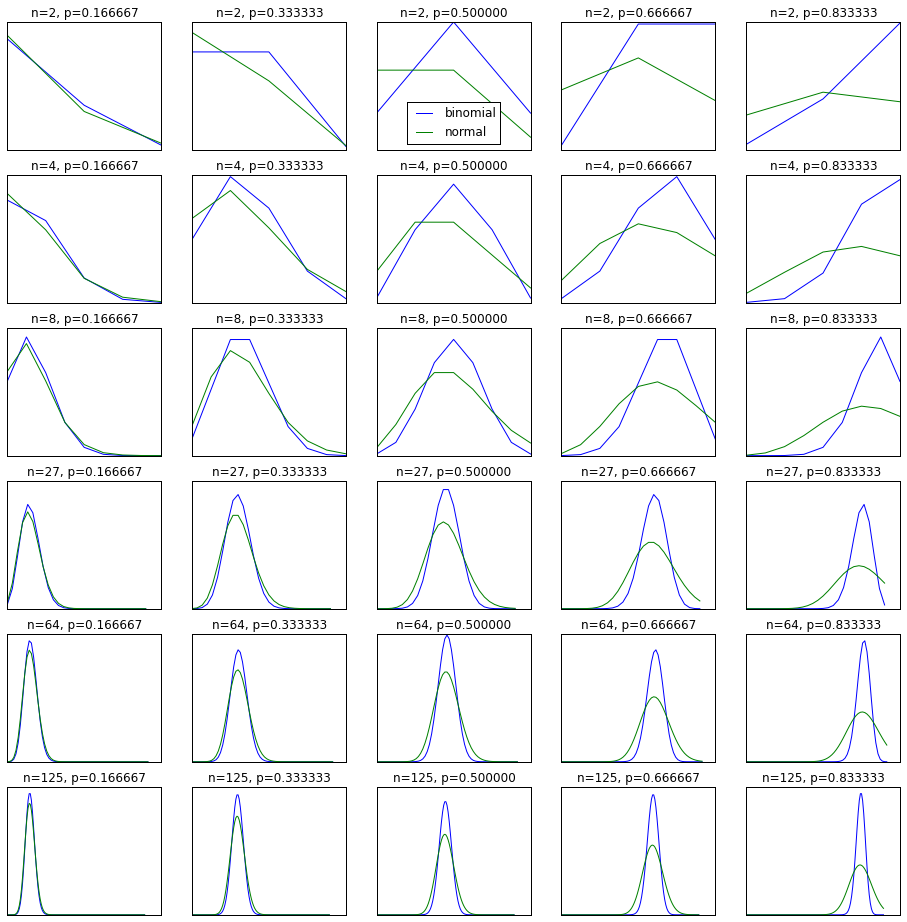

In [21]:
from scipy.misc import factorial

def f_poisson(k, ld):
    return ((e**(-ld)) * (ld**k)) / (factorial(k))

def ex73bb(): # draw the poisson over the binomial distribution
    pp.figure(figsize=(16,16))
    
    i = 0
    ns = hstack([array([2,4]), (arange(2,6)**3)])
    
    for n in ns:
        for p in linspace(0, 1, 7)[1:-1]:
            pp.subplot(len(ns),5,i+1)
            X = arange(n+1)

            Y_binomial = [f_binomial(x,n,p) for x in X]
            Y_normal = f_poisson(X, n*p)

            pp.plot(X, Y_binomial, label="binomial")
            pp.plot(X, Y_normal, label="normal")
            pp.title("n=%i, p=%f" % (n,p))
            pp.yticks([])
            pp.xticks([])
            if (i == 2):
                pp.legend(loc="lower center")
            
            i += 1
ex73bb()

#### under which conditions is it a good approx?
mean: lambda = n*p and for relatively low p.

#### vis. one example parameterization for a good/bad fit
in the figure above all examples on the left side seem to be reasonable. it gets worse the farther right you look (the higher p gets).

#### is it a good approx. of the random exp. above (coin toss)?
assuming a fair coin, it is not. for n=125, p=0.5 the probability to get k=64 "heads" is 0.0687. the poisson distribution predicts 0.0489.

In [25]:
print(f_binomial(64,125,0.5), "binomial")
print(f_poisson(64,125*0.5), "poisson")

0.0687234285754 binomial
0.048921424426 poisson
